In [64]:
import pandas as pd
import sklearn.tree as sktree
import scipy as sp
import os
path="C:/Users/SAMSUNG/Desktop/decisiontree"
filename=os.listdir(path)

## 변수설정

### Target(Y)

target = 침수여부

In [65]:
target=pd.read_csv(path+"/침수지역2022.csv")

위의 데이터는 침수지역의 빈도(frequency)이므로 바꿔야함

In [66]:
print('한번이라도 침수가 일어난 지역수(행정동) :',target["ADM_NM"].nunique())

한번이라도 침수가 일어난 지역수(행정동) : 277


In [67]:
target["ADM_NM"]

0         우이동
1         우이동
2         우이동
3        영등포동
4         송중동
        ...  
8882      청파동
8883      한남동
8884    원효로2동
8885      동선동
8886    북가좌2동
Name: ADM_NM, Length: 8887, dtype: object

In [68]:
target["ADM_CD"]

0       1130510400
1       1130510400
2       1130510400
3       1156010400
4       1130510100
           ...    
8882    1117013100
8883    1117010800
8884    1117011300
8885    1129010300
8886    1141011900
Name: ADM_CD, Length: 8887, dtype: int64

In [69]:
target["ADM_CD_2"]

0       1109074
1       1109074
2       1109074
3       1119074
4       1109071
         ...   
8882    1103071
8883    1103074
8884    1103057
8885    1108083
8886    1113072
Name: ADM_CD_2, Length: 8887, dtype: int64

### Feature(X)

In [70]:
filename

['2. 가공데이터',
 '경사도.xlsx',
 '도로현황(도로율)_20231015181102.csv',
 '배수등급양호비율.csv',
 '서울시_강우량_정보_2022년',
 '서울시_강우량_정보_2022년.zip',
 '서울시_행정동별_인구밀도_2023.csv',
 '여성.csv',
 '장애인.csv',
 '재해위험지구_경계도.csv',
 '제방.csv',
 '제방암거수문개수.csv',
 '침수지역2022.csv',
 '침수흔적도2022.csv',
 '하천까지의_거리.csv',
 '행정동_공시지가_2020.xlsx',
 '행정동_법정동.ipynb']

In [71]:
경사도=pd.read_excel(path+"/경사도.xlsx")
행정공시지가=pd.read_excel(path+"/"+'행정동_공시지가_2020.xlsx')
도로율=pd.read_csv(path+"/"+"도로현황(도로율)_20231015181102.csv")
배수등급양호비율=pd.read_csv(path+"/"+"배수등급양호비율.csv")
하천까지의거리=pd.read_csv(path+"/"+'하천까지의_거리.csv')
제방암거수문=pd.read_csv(path+"/"+'제방암거수문개수.csv',encoding='euc-kr')
인구밀도=pd.read_csv(path+"/"+'서울시_행정동별_인구밀도_2023.csv')

사회인프라

In [72]:
path2=path+"/"+'2. 가공데이터'

In [73]:
장애인=pd.read_csv(path2+"/"+"장애인.csv")
노인=pd.read_csv(path2+"/"+'노인.csv')
기초수급자=pd.read_csv(path2+"/"+"기초수급자.csv")
기초수급자_65세이상=pd.read_csv(path2+"/"+'기초생활수급자+65세이상.csv')

강우량

In [74]:
path3=path+"/"+'서울시_강우량_정보_2022년'

In [75]:
rain_dict={}
for i in range(1,10):
    rain_dict[i]=pd.read_csv(path3+"/"+f'서울시_강우량_정보_2022년0{i}월.csv',encoding='euc-kr')
for j in range(10,13):
    rain_dict[j]=pd.read_csv(path3+"/"+f'서울시_강우량_정보_2022년{j}월.csv',encoding='euc-kr')

In [76]:
rain_data=pd.concat([rain_dict[i][rain_dict[i]["10분우량"]!=0] for i in range(1,13)])
rain_agg=rain_data.groupby(["구청명"])["10분우량"].agg(["sum","count"])
rain_agg.rename(columns=dict(zip(["sum","count"],["누적강수량","10분당 측정(횟수)"])),inplace=True)
rain_agg.index.rename(None,inplace=True)

In [77]:
rain_agg["추정시우량(연간)"]=rain_agg["누적강수량"]/(rain_agg["10분당 측정(횟수)"]/6)

In [78]:
rain_agg.index.rename("시군구",inplace=True)
rain_agg.reset_index(inplace=True)

In [79]:
rain_agg

,시군구,누적강수량,10분당 측정(횟수),추정시우량(연간)
0,강남구,6044.5,4063,8.926163
1,강동구,3829.0,2745,8.369399
2,강북구,1803.5,1382,7.829957
3,강서구,3076.5,2574,7.171329
4,관악구,3777.0,2609,8.686087
5,광진구,1887.0,1353,8.368071
6,구로구,3553.5,2333,9.138877
7,금천구,3648.0,2539,8.620717
8,노원구,3686.5,2816,7.854759
9,도봉구,1932.0,1435,8.078049


### 데이터 병합

행정동 단위
> 경사도, 행정공시지가, 배수등급양호비율, 하천까지의 거리, 제방수문암거

In [80]:
import PublicDataReader as pdr
행정동코드 = pdr.code_hdong()
import numpy as np
행정동=행정동코드[행정동코드["시도명"]=="서울특별시"][["시군구명","읍면동명"]]
행정동.index=행정동.index.astype('int')
행정동["시군구명"]=행정동["시군구명"].str.strip()
행정동["읍면동명"]=행정동["읍면동명"].str.strip()
행정동=행정동[행정동["시군구명"]!=""][행정동["읍면동명"]!=""]

출처: 행정기관(행정동) 및 관할구역(법정동) 변경내역(2023. 7. 3. 시행)


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28700\2488655424.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  행정동=행정동[행정동["시군구명"]!=""][행정동["읍면동명"]!=""]


----------

In [81]:
per_경사도=pd.DataFrame(경사도.groupby(["ADM_NM"])["경사도"].mean())
per_경사도.reset_index(inplace=True)

In [82]:
pre_경사도=pd.merge(경사도[["GU_NAME","ADM_NM"]],per_경사도,how='left')
pre_경사도["경사도(%)"]=pre_경사도["경사도"]*100
pre_경사도.drop_duplicates(["ADM_NM"],inplace=True)

In [83]:
pre_경사도

,GU_NAME,ADM_NM,경사도,경사도(%)
0,종로구,이화동,0.078333,7.833333
1,종로구,숭인2동,0.053125,5.312500
2,종로구,혜화동,0.078333,7.833333
3,중구,광희동,0.072500,7.250000
4,중구,을지로동,0.040000,4.000000
...,...,...,...,...
3234,관악구,난곡동,0.231667,23.166667
3427,금천구,시흥2동,0.377857,37.785714
3431,관악구,난향동,0.330000,33.000000
3464,금천구,독산2동,0.142667,14.266667


In [84]:
행정공시지가[행정공시지가.columns[[0,1,-1]]].rename(columns=dict(zip(행정공시지가.columns[[0,1]],["GU_NAME","ADM_NM"])))

,GU_NAME,ADM_NM,​평균공시지가(원/㎡)
0,중구,명동1가,56614016.0
1,중구,충무로1가,54595752.0
2,중구,명동2가,49435106.0
3,중구,을지로1가,42678973.0
4,중구,을지로2가,36948338.0
...,...,...,...
463,강서구,오곡동,243750.0
464,서초구,원지동,189153.0
465,강서구,개화동,175646.0
466,강북구,우이동,169341.0


In [85]:
배수등급양호비율[["GU_NAME","ADM_NM","양호비율"]]

,GU_NAME,ADM_NM,양호비율
0,송파구,가락1동,0.654167
1,송파구,가락2동,0.842105
2,송파구,가락본동,0.680000
3,구로구,가리봉동,0.688073
4,금천구,가산동,0.610245
...,...,...,...
412,용산구,효창동,0.980769
413,용산구,후암동,1.000000
414,동대문구,휘경1동,0.405797
415,동대문구,휘경2동,0.300578


In [86]:
하천까지의거리[["GU_NAME","ADM_NM","HubDist"]]

,GU_NAME,ADM_NM,HubDist
0,종로구,사직동,961.440982
1,종로구,삼청동,481.426072
2,종로구,부암동,719.095967
3,종로구,평창동,70.039725
4,종로구,무악동,1381.962564
...,...,...,...
419,강동구,둔촌1동,1112.581499
420,강동구,둔촌2동,286.658161
421,강동구,암사1동,1421.991249
422,강동구,천호2동,713.146580


In [87]:
제방암거수문

,GU_NAME,ADM_NM,제방,수문,암거
0,강남구,개포1동,65,4,58
1,강남구,개포2동,30,11,95
2,강남구,개포4동,47,3,48
3,강남구,논현1동,0,0,64
4,강남구,논현2동,0,0,93
...,...,...,...,...,...
417,중랑구,상봉2동,1,0,16
418,중랑구,신내1동,56,8,243
419,중랑구,신내2동,3,0,26
420,중랑구,중화1동,4,0,12


In [88]:
인구밀도[["구","행정동","인구밀도(명/km²)"]]

,구,행정동,인구밀도(명/km²)
0,종로구,사직동,7618.699187
1,종로구,삼청동,1755.704698
2,종로구,부암동,4167.400881
3,종로구,평창동,2000.338219
4,종로구,무악동,22347.222220
...,...,...,...
421,강동구,둔촌1동,80.434783
422,강동구,둔촌2동,15520.512820
423,강동구,강일동,14638.053100
424,강동구,상일1동,21667.582420


In [89]:
행정동=pd.merge(배수등급양호비율[["GU_NAME","ADM_NM","양호비율"]],제방암거수문,how="left")
행정동=pd.merge(행정동,pre_경사도,how='left')
행정동.drop("경사도",axis=1,inplace=True)
행정동.rename(columns={"양호비율":"배수등급양호비율","경사도(%)":"평균경사도(%)"},inplace=True)
행정동=pd.merge(행정동,하천까지의거리[["GU_NAME","ADM_NM","HubDist"]],how="left").rename(columns={"HubDist":"하천까지의거리(중심)"})
행정동=pd.merge(행정동,인구밀도[["구","행정동","인구밀도(명/km²)"]].rename(columns={"구":"GU_NAME","행정동":"ADM_NM"}),how="left")

In [90]:
행정동.head(3)

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,암거,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²)
0,송파구,가락1동,0.654167,31.0,0.0,37.0,3.812500,542.994437,20605.22388
1,송파구,가락2동,0.842105,0.0,0.0,21.0,7.125000,1074.589206,32888.54167
2,송파구,가락본동,0.680000,0.0,0.0,34.0,10.785714,2056.158356,22821.23894


In [91]:
행정동.isna().sum()

GU_NAME        0
ADM_NM         0
배수등급양호비율       0
제방             2
수문             2
암거             2
평균경사도(%)       1
하천까지의거리(중심)    0
인구밀도(명/km²)    9
dtype: int64

Nan값 삭제

In [92]:
행정동.dropna(inplace=True)

--------

자치구별

In [93]:
도로율[["자치구별(2)","2022.2"]]

,자치구별(2),2022.2
0,자치구별(2),도로율 (%)
1,소계,23.35
2,종로구,21.15
3,중구,18.86
4,용산구,23.44
5,성동구,24.26
6,광진구,29.13
7,동대문구,22.74
8,중랑구,25.60
9,성북구,23.18


In [94]:
장애인[["동별(2)","장애인_per"]]

,동별(2),장애인_per
0,종로구,0.042206
1,중구,0.047262
2,용산구,0.035601
3,성동구,0.040202
4,광진구,0.036498
5,동대문구,0.046458
6,중랑구,0.053083
7,성북구,0.040730
8,강북구,0.059247
9,도봉구,0.049010


In [95]:
노인[["동별(2)","노인_per"]]

,동별(2),노인_per
0,종로구,0.184489
1,중구,0.189918
2,용산구,0.165642
3,성동구,0.156072
4,광진구,0.146727
5,동대문구,0.180027
6,중랑구,0.179242
7,성북구,0.168760
8,강북구,0.208990
9,도봉구,0.195573


In [96]:
rain_agg[["시군구","추정시우량(연간)"]]

,시군구,추정시우량(연간)
0,강남구,8.926163
1,강동구,8.369399
2,강북구,7.829957
3,강서구,7.171329
4,관악구,8.686087
5,광진구,8.368071
6,구로구,9.138877
7,금천구,8.620717
8,노원구,7.854759
9,도봉구,8.078049


In [97]:
시군구=pd.merge(도로율[["자치구별(2)","2022.2"]].loc[2:].rename(columns=dict(zip(["자치구별(2)","2022.2"],["동별(2)","도로율"])))
             ,노인[["동별(2)","노인_per"]])
시군구=pd.merge(시군구,장애인[["동별(2)","장애인_per"]])
시군구=pd.merge(시군구,기초수급자_65세이상[["자치구별(2)","per(기초생활수급자)",'per(기초생활수급자+65세이상)']].rename(
    columns=dict(zip(["자치구별(2)","per(기초생활수급자)",'per(기초생활수급자+65세이상)']
                     ,["동별(2)","기초생활수급자_per",'기초생활수급자+65세이상_per']))
))
시군구=pd.merge(시군구,rain_agg[["시군구","추정시우량(연간)"]].rename(columns={"시군구":"동별(2)"}))
시군구[[y for y in 시군구.columns if "per" in y]]=시군구[[y for y in 시군구.columns if "per" in y]].applymap(lambda x:x*100)
시군구["도로율"]=시군구["도로율"].astype("float")

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_28700\3432411731.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  시군구[[y for y in 시군구.columns if "per" in y]]=시군구[[y for y in 시군구.columns if "per" in y]].applymap(lambda x:x*100)


In [98]:
시군구

,동별(2),도로율,노인_per,장애인_per,기초생활수급자_per,기초생활수급자+65세이상_per,추정시우량(연간)
0,종로구,21.15,18.448941,4.220620,3.508514,1.578096,7.272297
1,중구,18.86,18.991788,4.726233,4.810223,2.285956,7.762706
2,용산구,23.44,16.564249,3.560130,3.952176,1.560540,7.587703
3,성동구,24.26,15.607165,4.020165,3.540936,1.468996,7.586804
4,광진구,29.13,14.672661,3.649844,3.890369,1.232481,8.368071
5,동대문구,22.74,18.002722,4.645774,4.781744,2.017811,7.856783
6,중랑구,25.60,17.924199,5.308269,6.875538,2.518254,7.756287
7,성북구,23.18,16.875989,4.072977,3.819461,1.485008,7.545552
8,강북구,17.77,20.898984,5.924687,7.236783,2.841112,7.829957
9,도봉구,23.93,19.557262,4.901019,4.748344,1.690083,8.078049


In [99]:
행정동

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,암거,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²)
0,송파구,가락1동,0.654167,31.0,0.0,37.0,3.812500,542.994437,20605.22388
1,송파구,가락2동,0.842105,0.0,0.0,21.0,7.125000,1074.589206,32888.54167
2,송파구,가락본동,0.680000,0.0,0.0,34.0,10.785714,2056.158356,22821.23894
3,구로구,가리봉동,0.688073,0.0,0.0,5.0,9.666667,1184.743571,31655.00000
4,금천구,가산동,0.610245,84.0,0.0,146.0,8.772727,468.909180,10567.85714
...,...,...,...,...,...,...,...,...,...
412,용산구,효창동,0.980769,1.0,0.0,20.0,12.666667,3363.536779,24777.27273
413,용산구,후암동,1.000000,2.0,0.0,7.0,39.625000,346.532474,19465.11628
414,동대문구,휘경1동,0.405797,1.0,0.0,5.0,5.800000,754.989114,25936.50794
415,동대문구,휘경2동,0.300578,13.0,6.0,92.0,5.583333,640.702435,24180.95238


In [100]:
통합=pd.merge(행정동,시군구.rename(columns={"동별(2)":"GU_NAME"}),how="left")

In [101]:
침수여부=pd.DataFrame(target["ADM_NM"].unique(),columns=["ADM_NM"])
침수여부["침수여부"]=1
통합=pd.merge(통합,침수여부,how="left")
통합=통합.fillna(0)

In [102]:
통합

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,암거,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,기초생활수급자+65세이상_per,추정시우량(연간),침수여부
0,송파구,가락1동,0.654167,31.0,0.0,37.0,3.812500,542.994437,20605.22388,20.14,14.259492,3.117333,2.653057,0.920666,9.000000,1.0
1,송파구,가락2동,0.842105,0.0,0.0,21.0,7.125000,1074.589206,32888.54167,20.14,14.259492,3.117333,2.653057,0.920666,9.000000,1.0
2,송파구,가락본동,0.680000,0.0,0.0,34.0,10.785714,2056.158356,22821.23894,20.14,14.259492,3.117333,2.653057,0.920666,9.000000,1.0
3,구로구,가리봉동,0.688073,0.0,0.0,5.0,9.666667,1184.743571,31655.00000,21.55,17.483236,4.669164,3.372114,1.338061,9.138877,1.0
4,금천구,가산동,0.610245,84.0,0.0,146.0,8.772727,468.909180,10567.85714,22.37,17.127026,5.017209,5.388524,2.088480,8.620717,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,용산구,효창동,0.980769,1.0,0.0,20.0,12.666667,3363.536779,24777.27273,23.44,16.564249,3.560130,3.952176,1.560540,7.587703,0.0
401,용산구,후암동,1.000000,2.0,0.0,7.0,39.625000,346.532474,19465.11628,23.44,16.564249,3.560130,3.952176,1.560540,7.587703,0.0
402,동대문구,휘경1동,0.405797,1.0,0.0,5.0,5.800000,754.989114,25936.50794,22.74,18.002722,4.645774,4.781744,2.017811,7.856783,0.0
403,동대문구,휘경2동,0.300578,13.0,6.0,92.0,5.583333,640.702435,24180.95238,22.74,18.002722,4.645774,4.781744,2.017811,7.856783,0.0


----------

## 모델생성

In [103]:
import sklearn.tree as sktree
import sklearn.preprocessing as skpre
import numpy as np
import sklearn.model_selection as skmod
import matplotlib.pyplot as plt
np.random.seed(10)

In [104]:
feature_cols=['배수등급양호비율', '제방', '수문', '암거', '평균경사도(%)',
       '하천까지의거리(중심)', '인구밀도(명/km²)', '도로율', '노인_per', '장애인_per', '기초생활수급자_per',
       '기초생활수급자+65세이상_per', '추정시우량(연간)']
target_cols=["침수여부"]

In [105]:
train,test=skmod.train_test_split(통합,train_size=0.7,random_state=10)

In [106]:
params_model=sktree.DecisionTreeClassifier(criterion="entropy")
params_model.fit(X=train[feature_cols],y=train[target_cols])

DecisionTreeClassifier(criterion='entropy')

In [107]:
params_model.score(X=test[feature_cols],y=test[target_cols])

0.6639344262295082

In [108]:
print("max_depth :",params_model.get_depth())
print("max_sample_size :",params_model.get_n_leaves())

max_depth : 14
max_sample_size : 56


In [109]:
plt.figure()
sktree.plot_tree(params_model,filled=True)
plt.savefig("tree.png",dpi=1000,bbox_inches='tight')
plt.close()

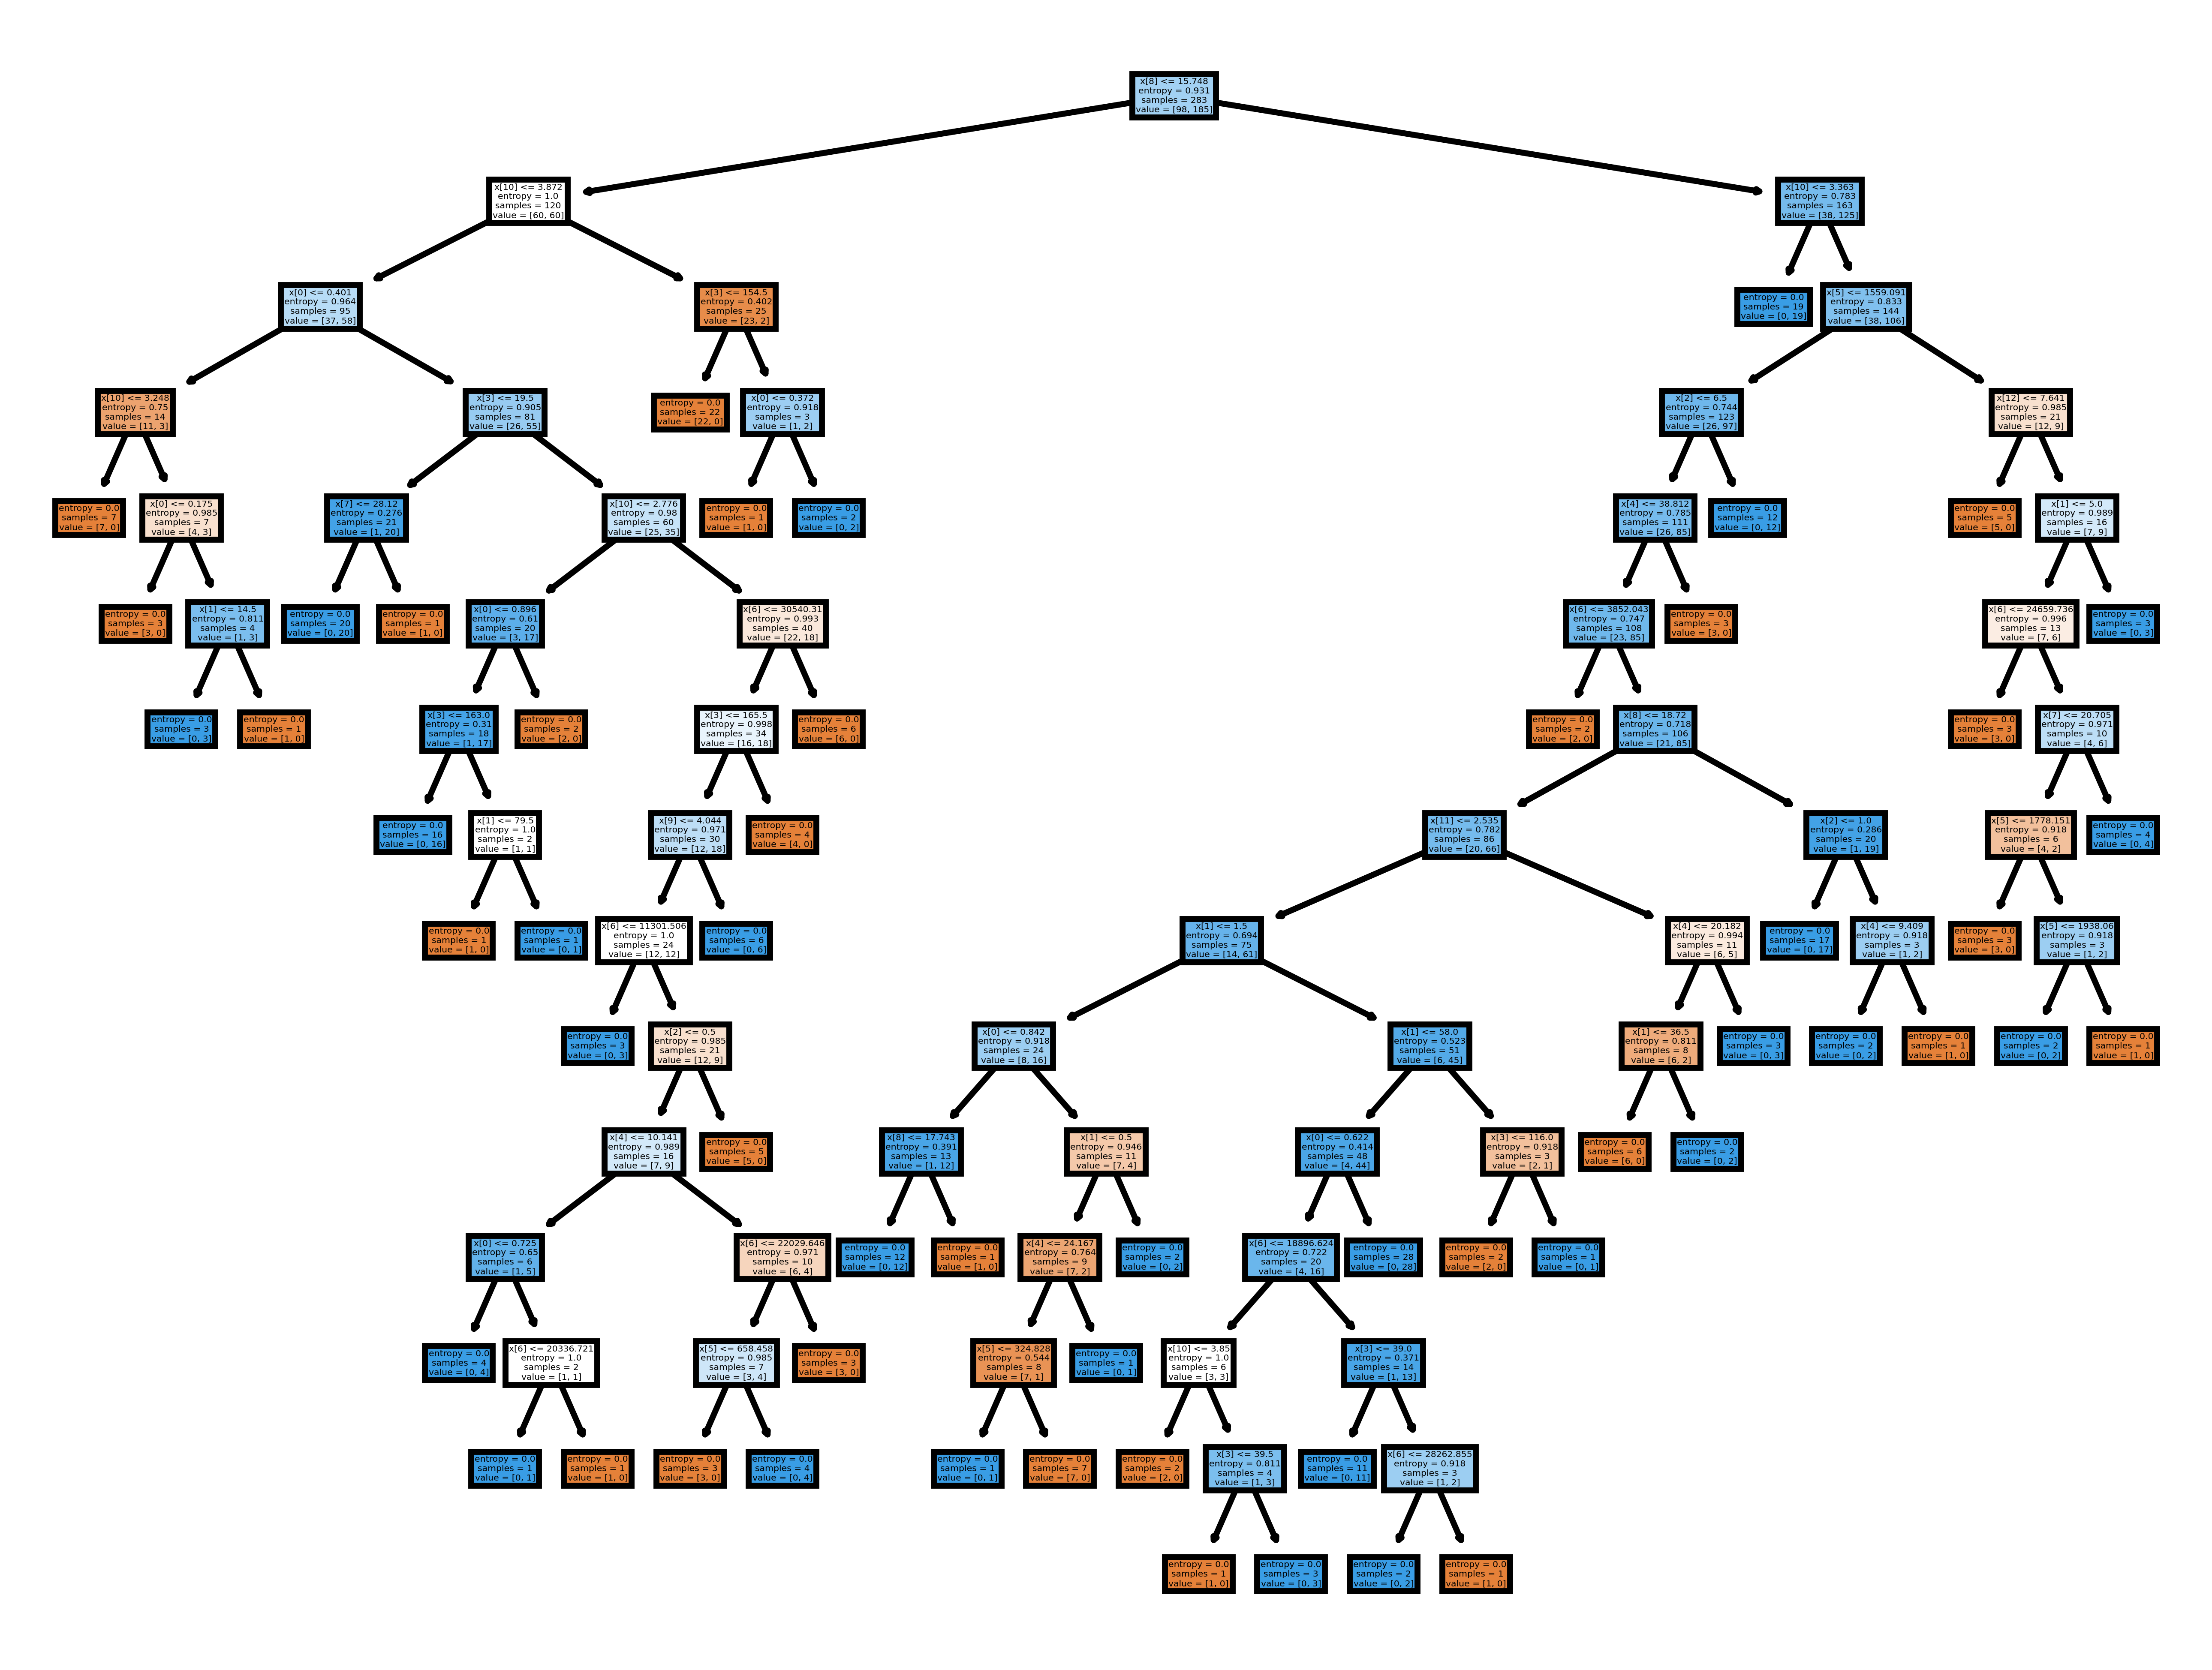

### 파라미터 최적화

random_search 로 탐색해보겠음..

In [110]:
print("log_size : ",np.log(len(train)))
print("5%_size : ",len(train)*0.05)

log_size :  5.645446897643238
5%_size :  14.15


In [111]:
print(len(test))

122


test 사이즈와 똑같이 나누기

In [112]:
import scipy as sp

In [113]:
params={"max_depth":sp.stats.randint(low=2,high=18),"min_samples_split":sp.stats.randint(low=2,high=56)}
Random_model=skmod.RandomizedSearchCV(params_model,param_distributions=params,cv=10,random_state=10,n_iter=500,n_jobs=-1
                                      ,scoring="accuracy")
Random_model.fit(X=통합[feature_cols],y=통합[target_cols])

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002036D0949B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002036F9EFEC0>},
                   random_state=10, scoring='accuracy')

In [114]:
print('결과 :',Random_model.best_params_)

결과 : {'max_depth': 4, 'min_samples_split': 50}


위의 결과를 토대로 의사결정나무를 만들것

### 부트스트랩
40개의 데이터 셋 구현

In [115]:
import sklearn.utils as skuti

In [116]:
resample_data=[]
for i in range(40):
    resample_result=skuti.resample(통합,replace=True,random_state=i+1)
    resample_data.append(resample_result)

In [117]:
통합.loc[list(set(통합.index)-set(resample_data[0].index))]

,GU_NAME,ADM_NM,배수등급양호비율,제방,수문,암거,평균경사도(%),하천까지의거리(중심),인구밀도(명/km²),도로율,노인_per,장애인_per,기초생활수급자_per,기초생활수급자+65세이상_per,추정시우량(연간),침수여부
0,송파구,가락1동,0.654167,31.0,0.0,37.0,3.812500,542.994437,20605.223880,20.14,14.259492,3.117333,2.653057,0.920666,9.000000,1.0
4,금천구,가산동,0.610245,84.0,0.0,146.0,8.772727,468.909180,10567.857140,22.37,17.127026,5.017209,5.388524,2.088480,8.620717,1.0
5,강서구,가양1동,0.208668,16.0,2.0,486.0,16.178571,764.816068,7312.765957,26.22,15.596889,5.026607,5.338918,2.225628,7.171329,0.0
6,강서구,가양2동,0.029412,23.0,0.0,35.0,7.000000,2009.312300,13847.000000,26.22,15.596889,5.026607,5.338918,2.225628,7.171329,0.0
9,은평구,갈현1동,0.863248,6.0,0.0,22.0,19.458333,1663.330294,15877.319590,22.14,17.842755,4.671396,5.071327,1.941785,7.694750,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,서대문구,홍제3동,0.774194,50.0,3.0,15.0,18.692308,395.333464,22091.358020,17.46,17.205958,4.073199,3.748701,1.558330,7.417249,0.0
392,강서구,화곡4동,0.941176,3.0,0.0,10.0,13.437500,2576.285615,24789.024390,26.22,15.596889,5.026607,5.338918,2.225628,7.171329,0.0
394,강서구,화곡8동,0.918367,0.0,0.0,10.0,17.937500,3220.936378,45864.150940,26.22,15.596889,5.026607,5.338918,2.225628,7.171329,0.0
400,용산구,효창동,0.980769,1.0,0.0,20.0,12.666667,3363.536779,24777.272730,23.44,16.564249,3.560130,3.952176,1.560540,7.587703,0.0


In [118]:
tree_model=sktree.DecisionTreeClassifier(max_depth=Random_model.best_params_["max_depth"],min_samples_split=Random_model.best_params_["min_samples_split"],random_state=10)
acc_list=[]
for i in range(40):
    temp_test=통합.loc[list(set(통합.index)-set(resample_data[i].index))]
    tree_model.fit(X=resample_data[i][feature_cols],y=resample_data[i][target_cols])
    acc_list.append(tree_model.score(X=temp_test[feature_cols],y=temp_test[target_cols]))

In [119]:
나무결과=pd.DataFrame(acc_list).rename(columns={0:'accuracy'})
나무결과["테스트_오차율"]=1-나무결과["accuracy"]

#### 가설검정
일반화 오차율

In [120]:
나무결과["테스트_오차율"]

0     0.333333
1     0.269504
2     0.340000
3     0.264901
4     0.321168
5     0.337931
6     0.290780
7     0.317881
8     0.370130
9     0.292208
10    0.218543
11    0.311594
12    0.308219
13    0.204225
14    0.380952
15    0.382979
16    0.309353
17    0.348101
18    0.243421
19    0.236111
20    0.299320
21    0.248322
22    0.270833
23    0.294521
24    0.328859
25    0.354610
26    0.324324
27    0.370629
28    0.389262
29    0.309211
30    0.264901
31    0.373239
32    0.319444
33    0.275641
34    0.267974
35    0.251572
36    0.260563
37    0.350993
38    0.374150
39    0.316129
Name: 테스트_오차율, dtype: float64

In [121]:
sp.stats.ttest_1samp(나무결과["테스트_오차율"],0.33)

TtestResult(statistic=-2.8696907041330157, pvalue=0.006603276315027279, df=39)

일반화 오차율은 33%로 예상됨.           
즉, 일반화 accuracy는 67%

## 결과해석

In [122]:
final_tree_model=sktree.DecisionTreeClassifier(max_depth=Random_model.best_params_["max_depth"],min_samples_split=Random_model.best_params_["min_samples_split"],random_state=10)
final_tree_model.fit(X=통합[feature_cols],y=통합[target_cols])

DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=10)

In [123]:
info_result=pd.DataFrame(list(zip(final_tree_model.feature_names_in_,final_tree_model.feature_importances_))).rename(columns={0:"feature_name",1:"infomation_gain"})
info_result["infomation_gain"]=info_result["infomation_gain"].apply(lambda x:x*100)
info_result.sort_values(by="infomation_gain",ascending=False,inplace=True)
info_result.to_csv("./information_gain.csv")

In [124]:
info_result

,feature_name,infomation_gain
12,추정시우량(연간),31.434091
10,기초생활수급자_per,26.295523
5,하천까지의거리(중심),15.923457
9,장애인_per,9.886516
11,기초생활수급자+65세이상_per,8.374145
6,인구밀도(명/km²),8.086268
0,배수등급양호비율,0.000000
1,제방,0.000000
2,수문,0.000000
3,암거,0.000000
